In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

## Import data

In [2]:
# test = pd.read_csv('test.csv') # doesn't have labels
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [3]:
df = pd.concat([train, 
                  valid, 
#                  test,
                  ], axis=0).reset_index(drop=True)
df.head(5)

,id,title,text,label
0,0,China and Economic Reform: Xi Jinping’s Track ...,Economists generally agree: China must overhau...,news
1,1,Trade to Be a Big Topic in Theresa May’s U.S. ...,LONDON—British Prime Minister Theresa May said...,news
2,2,"The Top Beaches In The World, According To Nat...",Beaches come in all sorts of shapes and sizes ...,clickbait
3,3,Sheriff’s Report Provides New Details on Tamir...,"A timeline of what happened after Tamir Rice, ...",clickbait
4,4,Surgeon claiming he will transplant volunteer'...,An Italian neurosurgeon who has claimed for mo...,news


In [4]:
df.rename(columns={'label': 'is_clickbait'}, inplace=True)

In [5]:
df['is_clickbait'].value_counts(dropna=False)

is_clickbait
news         16738
other         7394
clickbait     4291
Name: count, dtype: int64

#### Select columns

In [6]:
df = df[['title','is_clickbait']]
df.head(15)

,title,is_clickbait
0,China and Economic Reform: Xi Jinping’s Track ...,news
1,Trade to Be a Big Topic in Theresa May’s U.S. ...,news
2,"The Top Beaches In The World, According To Nat...",clickbait
3,Sheriff’s Report Provides New Details on Tamir...,clickbait
4,Surgeon claiming he will transplant volunteer'...,news
5,This Is How Differently Priced Spanx Can Actua...,news
6,Samantha Bee and Jane Pauley Are Breaking the ...,news
7,Krauthammer: Syria Strike 'Total Contradiction...,news
8,Rust Belt voters made Trump president. Now the...,news
9,"As Illegal Outpost Cleared, Israeli PM Netanya...",news


In [7]:
df['title'][13]

'Jared Kushner in Iraq With Joint Chiefs Chairman'

## EDA

#### Basic info about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28423 entries, 0 to 28422
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         22780 non-null  object
 1   is_clickbait  28423 non-null  object
dtypes: object(2)
memory usage: 444.2+ KB


In [9]:
df.describe()

,title,is_clickbait
count,22780,28423
unique,22642,3
top,NBC NewsVerifizierter Account,news
freq,22,16738


Text(0.5, 1.0, 'Label Counts')

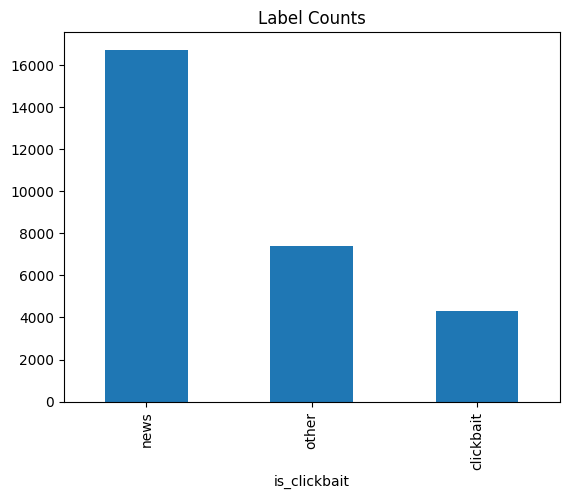

In [10]:
# as numbers
df.is_clickbait.value_counts()
# as percentage
df.is_clickbait.value_counts(normalize=True)
# plot
df['is_clickbait'].value_counts().plot(kind='bar').set_title('Label Counts')

#### Check for NaNs in the dataset

In [11]:
df.isna().sum()

title           5643
is_clickbait       0
dtype: int64

## Data preparation

In [12]:
# remove rows with no label
df = df[~df['is_clickbait'].isna()]
# remove rows with no title
df = df[~df['title'].isna()]

In [13]:
# remap labels to 0 and 1 (0 = not clickbait, 1 = clickbait)
df['is_clickbait'] = np.where(df['is_clickbait'] == 'clickbait', 1, 0)

In [14]:
df.head()

,title,is_clickbait
0,China and Economic Reform: Xi Jinping’s Track ...,0
1,Trade to Be a Big Topic in Theresa May’s U.S. ...,0
2,"The Top Beaches In The World, According To Nat...",1
3,Sheriff’s Report Provides New Details on Tamir...,1
4,Surgeon claiming he will transplant volunteer'...,0


In [15]:
# export to csv
df['dataset'] = 'clickbait-news-detection'
df.to_csv('labeled.csv', index=False)